In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

In [2]:
dfSmartBins_1 = pd.read_csv('smart-bins_1.csv')
dfSmartBins_1['id'] = range(1, len(dfSmartBins_1.index) + 1)
dfSmartBins_1.set_index('id')

dfSmartBins_2 = pd.read_csv('smart-bins_2.csv')
dfSmartBins_2['id'] = range(len(dfSmartBins_1.index) + 1, len(dfSmartBins_1.index) + len(dfSmartBins_2.index) + 1)
dfSmartBins_2.set_index('id')

dfSmartBins = pd.concat([dfSmartBins_1, dfSmartBins_2], axis=0)
dfSmartBins = dfSmartBins.set_index('id')
dfSmartBins

,batteryHealth,binId,binStatus,currentFillLevel,latLong,timesTamp
id,,,,,,
1,95,CleanCUBE-A1905081905AA07,Half Full,55,NaN,2021-09-21 13:00:03
2,100,CleanFLEX-FB2000001911AA89,Full,92,NaN,2021-09-21 13:00:03
3,10,CleanFLEX-FB1000001906AA19,Full,100,NaN,2021-09-21 13:00:03
4,10,CleanFLEX-FB1000001906AA18,Low,14,NaN,2021-09-21 13:00:03
5,95,CleanCUBE-A1905081905AA02,Low,0,NaN,2021-09-21 13:00:03
...,...,...,...,...,...,...
38796,10,CleanFLEX-FB2000002008AC19,Low,18,"-33.920289, 151.257056",2021-10-22 11:00:12
38797,95,CleanFLEX-FB2000002005AB64,Full,77,"-33.920816, 151.257022",2021-10-22 11:00:12
38798,95,CleanFLEX-FB2000002005AB66,Low,12,"-33.920944, 151.257001",2021-10-22 11:00:12


# Data Cleaning

In [3]:
dfSmartBins = dfSmartBins[~dfSmartBins.isnull().T.any()]
dfSmartBins = dfSmartBins[~(dfSmartBins.timesTamp < '2021-09-21')]
dfSmartBins

,batteryHealth,binId,binStatus,currentFillLevel,latLong,timesTamp
id,,,,,,
6,100,CleanFLEX-FB2000002008AC03,Low,28,"-33.918951, 151.25847",2021-09-21 13:00:03
7,100,CleanFLEX-FB2000002008AC05,Half Full,36,"-33.919505, 151.257857",2021-09-21 13:00:03
8,100,CleanFLEX-FB2000002008AC01,Low,18,"-33.919135, 151.258104",2021-09-21 13:00:03
9,100,CleanFLEX-FB2000002008AC02,Low,29,"-33.920227, 151.257692",2021-09-21 13:00:03
10,100,CleanFLEX-FB2000002008AC12,Low,13,"-33.919727, 151.257213",2021-09-21 13:00:03
...,...,...,...,...,...,...
38794,10,CleanFLEX-FB2000002008AC06,Full,88,"-33.91947, 151.257542",2021-10-22 11:00:12
38795,10,CleanFLEX-FB2000002008AC20,Low,17,"-33.920372, 151.257036",2021-10-22 11:00:12
38796,10,CleanFLEX-FB2000002008AC19,Low,18,"-33.920289, 151.257056",2021-10-22 11:00:12


## Duplicados

In [4]:
dfSmartBins[dfSmartBins.duplicated()]

,batteryHealth,binId,binStatus,currentFillLevel,latLong,timesTamp
id,,,,,,
6802,100,CleanFLEX-FB2000002008AC02,Half Full,52,"-33.920227, 151.257692",2021-09-27 04:00:08
6803,100,CleanFLEX-FB2000002008AC01,Low,23,"-33.919135, 151.258104",2021-09-27 04:00:08
6804,100,CleanFLEX-FB2000002008AC03,Low,7,"-33.918951, 151.25847",2021-09-27 04:00:08
6809,100,CleanFLEX-FB2000002008AC17,Half Full,48,"-33.91947, 151.257542",2021-09-27 04:00:08
6810,100,CleanFLEX-FB2000002008AC05,Low,11,"-33.919505, 151.257857",2021-09-27 04:00:08
...,...,...,...,...,...,...
38794,10,CleanFLEX-FB2000002008AC06,Full,88,"-33.91947, 151.257542",2021-10-22 11:00:12
38795,10,CleanFLEX-FB2000002008AC20,Low,17,"-33.920372, 151.257036",2021-10-22 11:00:12
38796,10,CleanFLEX-FB2000002008AC19,Low,18,"-33.920289, 151.257056",2021-10-22 11:00:12


In [5]:
dfSmartBins[(dfSmartBins.binId == 'CleanFLEX-FB2000002005AB66') & (dfSmartBins.timesTamp == '2021-10-06 20:00:04')]

,batteryHealth,binId,binStatus,currentFillLevel,latLong,timesTamp
id,,,,,,
18198,95,CleanFLEX-FB2000002005AB66,Low,19,"-33.920944, 151.257001",2021-10-06 20:00:04
18248,95,CleanFLEX-FB2000002005AB66,Low,19,"-33.920944, 151.257001",2021-10-06 20:00:04


In [6]:
dfSmartBins = dfSmartBins[~dfSmartBins.duplicated()]
dfSmartBins

,batteryHealth,binId,binStatus,currentFillLevel,latLong,timesTamp
id,,,,,,
6,100,CleanFLEX-FB2000002008AC03,Low,28,"-33.918951, 151.25847",2021-09-21 13:00:03
7,100,CleanFLEX-FB2000002008AC05,Half Full,36,"-33.919505, 151.257857",2021-09-21 13:00:03
8,100,CleanFLEX-FB2000002008AC01,Low,18,"-33.919135, 151.258104",2021-09-21 13:00:03
9,100,CleanFLEX-FB2000002008AC02,Low,29,"-33.920227, 151.257692",2021-09-21 13:00:03
10,100,CleanFLEX-FB2000002008AC12,Low,13,"-33.919727, 151.257213",2021-09-21 13:00:03
...,...,...,...,...,...,...
38743,10,CleanFLEX-FB2000002008AC06,Full,88,"-33.91947, 151.257542",2021-10-22 10:00:05
38745,95,CleanFLEX-FB2000002005AB64,Full,76,"-33.920816, 151.257022",2021-10-22 10:00:05
38746,10,CleanFLEX-FB2000002008AC20,Low,17,"-33.920372, 151.257036",2021-10-22 10:00:05


In [7]:
dfSmartBins[(dfSmartBins.binId == 'CleanFLEX-FB2000002005AB66') & (dfSmartBins.timesTamp == '2021-10-06 20:00:04')]

,batteryHealth,binId,binStatus,currentFillLevel,latLong,timesTamp
id,,,,,,
18198,95,CleanFLEX-FB2000002005AB66,Low,19,"-33.920944, 151.257001",2021-10-06 20:00:04


In [8]:
dfSmartBins = dfSmartBins.drop(dfSmartBins[dfSmartBins.timesTamp > '2021-10-10'].index, axis=0)
dfSmartBins

,batteryHealth,binId,binStatus,currentFillLevel,latLong,timesTamp
id,,,,,,
6,100,CleanFLEX-FB2000002008AC03,Low,28,"-33.918951, 151.25847",2021-09-21 13:00:03
7,100,CleanFLEX-FB2000002008AC05,Half Full,36,"-33.919505, 151.257857",2021-09-21 13:00:03
8,100,CleanFLEX-FB2000002008AC01,Low,18,"-33.919135, 151.258104",2021-09-21 13:00:03
9,100,CleanFLEX-FB2000002008AC02,Low,29,"-33.920227, 151.257692",2021-09-21 13:00:03
10,100,CleanFLEX-FB2000002008AC12,Low,13,"-33.919727, 151.257213",2021-09-21 13:00:03
...,...,...,...,...,...,...
24744,100,CleanFLEX-FB2000002008AC06,Full,88,"-33.91947, 151.257542",2021-10-09 23:00:04
24745,95,CleanFLEX-FB2000002008AC20,Low,9,"-33.920372, 151.257036",2021-10-09 23:00:04
24746,100,CleanFLEX-FB2000002008AC13,Low,23,"-33.920034, 151.257165",2021-10-09 23:00:04


# Análises de Dados

In [9]:
dfSmartBins

,batteryHealth,binId,binStatus,currentFillLevel,latLong,timesTamp
id,,,,,,
6,100,CleanFLEX-FB2000002008AC03,Low,28,"-33.918951, 151.25847",2021-09-21 13:00:03
7,100,CleanFLEX-FB2000002008AC05,Half Full,36,"-33.919505, 151.257857",2021-09-21 13:00:03
8,100,CleanFLEX-FB2000002008AC01,Low,18,"-33.919135, 151.258104",2021-09-21 13:00:03
9,100,CleanFLEX-FB2000002008AC02,Low,29,"-33.920227, 151.257692",2021-09-21 13:00:03
10,100,CleanFLEX-FB2000002008AC12,Low,13,"-33.919727, 151.257213",2021-09-21 13:00:03
...,...,...,...,...,...,...
24744,100,CleanFLEX-FB2000002008AC06,Full,88,"-33.91947, 151.257542",2021-10-09 23:00:04
24745,95,CleanFLEX-FB2000002008AC20,Low,9,"-33.920372, 151.257036",2021-10-09 23:00:04
24746,100,CleanFLEX-FB2000002008AC13,Low,23,"-33.920034, 151.257165",2021-10-09 23:00:04


## Qual tempo médio que cada lixeira leva para ser coletada?

In [10]:
bins = set()

for bin in dfSmartBins.binId.values:
    bins.add(bin)
bins = list(bins)

In [52]:
df = dfSmartBins[(dfSmartBins.binId == 'CleanFLEX-FB2000002008AC12') & ((dfSmartBins.timesTamp >= '2021-09-22 00:00:00') & (dfSmartBins.timesTamp <= '2021-09-22 23:59:59'))]
df

,batteryHealth,binId,binStatus,currentFillLevel,latLong,timesTamp
id,,,,,,
560,100,CleanFLEX-FB2000002008AC12,Low,16,"-33.919727, 151.257213",2021-09-22 00:00:04
609,100,CleanFLEX-FB2000002008AC12,Half Full,44,"-33.919727, 151.257213",2021-09-22 01:00:05
660,100,CleanFLEX-FB2000002008AC12,Half Full,61,"-33.919727, 151.257213",2021-09-22 02:00:05
713,100,CleanFLEX-FB2000002008AC12,Low,0,"-33.919727, 151.257213",2021-09-22 03:00:05
761,100,CleanFLEX-FB2000002008AC12,Low,3,"-33.919727, 151.257213",2021-09-22 04:00:05
808,100,CleanFLEX-FB2000002008AC12,Low,7,"-33.919727, 151.257213",2021-09-22 05:00:03
860,100,CleanFLEX-FB2000002008AC12,Low,9,"-33.919727, 151.257213",2021-09-22 06:00:04
909,100,CleanFLEX-FB2000002008AC12,Low,15,"-33.919727, 151.257213",2021-09-22 07:00:03
963,100,CleanFLEX-FB2000002008AC12,Low,20,"-33.919727, 151.257213",2021-09-22 08:00:03


In [46]:
tempo_coleta(df) 

[3, 20]


11.5

In [53]:
def tempo_coleta(df):
    tempo_hora = 0
    tempo = []

    if len(df) > 0:
            
        old_status = df.binStatus.values[0]
    
        for status in df.binStatus.values[1:]:
            if (((old_status == 'Half Full') | (old_status == 'Full'))  & (status == 'Low')):
                tempo.append(tempo_hora + 1)
                tempo_hora = 0
                old_status = status
 
            else:
                tempo_hora += 1
                old_status = status
    print(tempo)
    if (len(tempo) > 0):
        return (sum(tempo) / len(tempo)) / 24
    return 0
                    
tempo_medio_coleta = {}
for bin in bins:
    df = dfSmartBins[dfSmartBins.binId == bin]
    tempo_medio_coleta[bin] = tempo_coleta(df)     

[14, 21, 18, 8, 21, 6, 88, 46, 78, 37]
[13, 16, 5, 4, 15, 11, 13, 8, 6, 333]
[34, 19, 23, 12, 12, 123, 159]
[53, 24, 48, 216, 40]
[30, 47, 24, 74, 49, 158, 41]
[77, 24, 171, 39, 89, 21]
[252, 15, 43, 65, 45]
[13, 22, 4, 15, 5, 3, 2, 13, 5, 6, 135, 93]
[14, 24, 15, 24, 10, 14, 166, 50]
[13, 21, 21, 22, 24, 97, 45, 99, 30]
[13, 21, 18, 11, 13, 73]
[14, 20, 20, 7, 15, 14, 11, 123, 94]
[226, 21, 63, 101, 16]
[14, 20, 19, 11, 15, 7, 112, 143, 40, 43]
[13, 21, 19, 11, 15, 7, 15, 121, 94, 48, 40]
[34, 19, 11, 12, 10, 14, 168, 49]
[]
[]
[76, 82, 54, 60, 38, 29, 37, 45]
[76, 194, 19, 20, 66, 45]
[54, 22, 47]
[76, 196, 39, 110]
[]
[13, 26, 13, 8, 16, 7, 42, 97, 70, 46]
[75, 74, 55, 68, 38, 33, 32, 45]
[5, 29, 19, 10, 13, 11, 13, 73, 69, 122, 35, 22]
[5, 8, 21, 4, 15, 24, 8, 4, 66, 69, 70, 49]
[13, 20, 19, 24, 24, 49, 49, 94, 85, 49]
[53, 23, 10, 10, 4, 49, 49, 184, 38]
[76, 17, 3, 175, 22, 17, 96, 14]


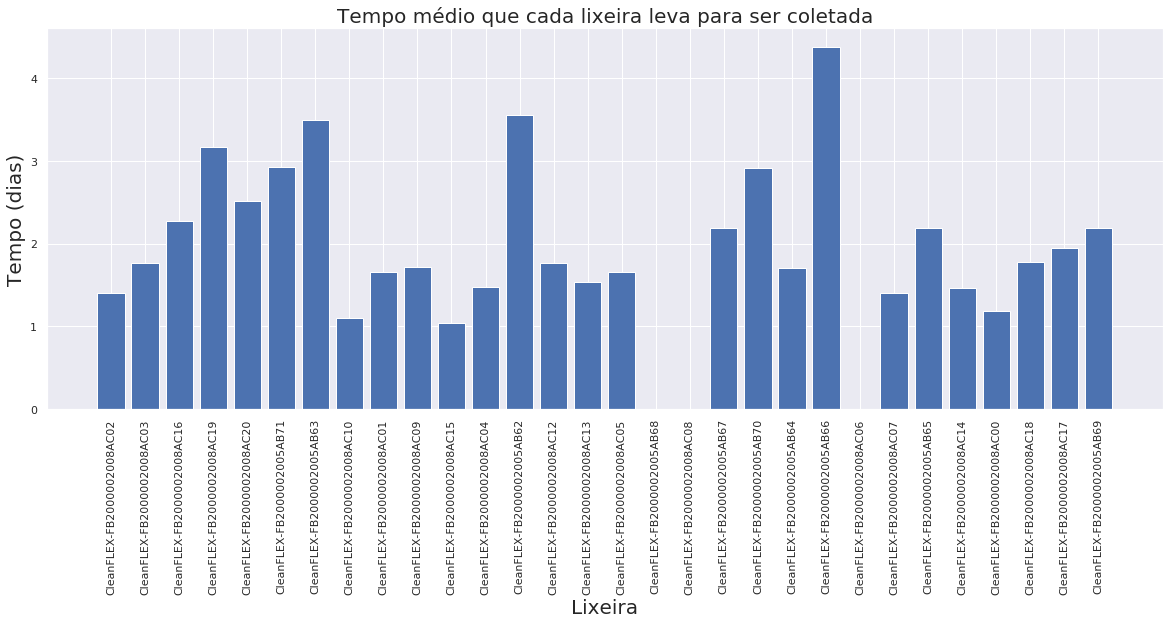

In [50]:
plt.figure(figsize=(20, 7))
plt.bar(tempo_medio_coleta.keys(), tempo_medio_coleta.values())
plt.xticks(rotation=90)
plt.title('Tempo médio que cada lixeira leva para ser coletada', fontsize=20)
plt.xlabel('Lixeira', fontsize=20)
plt.ylabel('Tempo (dias)', fontsize=20)
plt.show()

## Quantas coletas é realizada em cada lixeira a cada dia?

In [13]:
timesTamps = set()
for time in dfSmartBins.timesTamp.values:
    date = time.split(' ')[0]
    timesTamps.add(date)
    
timesTamps = sorted(list(timesTamps))

In [14]:
def quantidade_coleta(df, dias):
    result = {'dia': [], 'quantidade_coleta': []}
    for dia in dias:
        quantidade = 0
        dfResult = df[(df.timesTamp >= dia+' 00:00:00') & (df.timesTamp <= dia+' 23:59:00')]
        
        if len(dfResult) > 0:
            
            old_status = dfResult.binStatus.values[0]
            for status in dfResult.binStatus.values[1:]:
                if (((old_status == 'Full') & ((status == 'Low') | (status == 'Half Full'))) | ((old_status == 'Half Full') & (status == 'Low'))):
                    quantidade += 1
                old_status = status 
        
        result['dia'].append(dia)
        result['quantidade_coleta'].append(quantidade)
    return result   

result = {}
for bin in bins:
    df = dfSmartBins[dfSmartBins.binId == bin]
    result[bin] = quantidade_coleta(df, timesTamps)  

In [15]:
df_dados = pd.DataFrame(columns=('bin', 'dia', 'quantidade_coleta'))
for bin in result.keys():
    dias = result[bin].get('dia')
    for d in range(len(dias)):
        dia = dias[d]
        df_dados = df_dados.append({
            'bin': bin,
            'dia': dia,
            'quantidade_coleta': result[bin].get('quantidade_coleta')[d]
        }, ignore_index=True)
    
df_dados    

,bin,dia,quantidade_coleta
0,CleanFLEX-FB2000002008AC02,2021-09-21,0
1,CleanFLEX-FB2000002008AC02,2021-09-22,1
2,CleanFLEX-FB2000002008AC02,2021-09-23,1
3,CleanFLEX-FB2000002008AC02,2021-09-24,2
4,CleanFLEX-FB2000002008AC02,2021-09-25,1
...,...,...,...
565,CleanFLEX-FB2000002005AB69,2021-10-05,0
566,CleanFLEX-FB2000002005AB69,2021-10-06,0
567,CleanFLEX-FB2000002005AB69,2021-10-07,0
568,CleanFLEX-FB2000002005AB69,2021-10-08,0


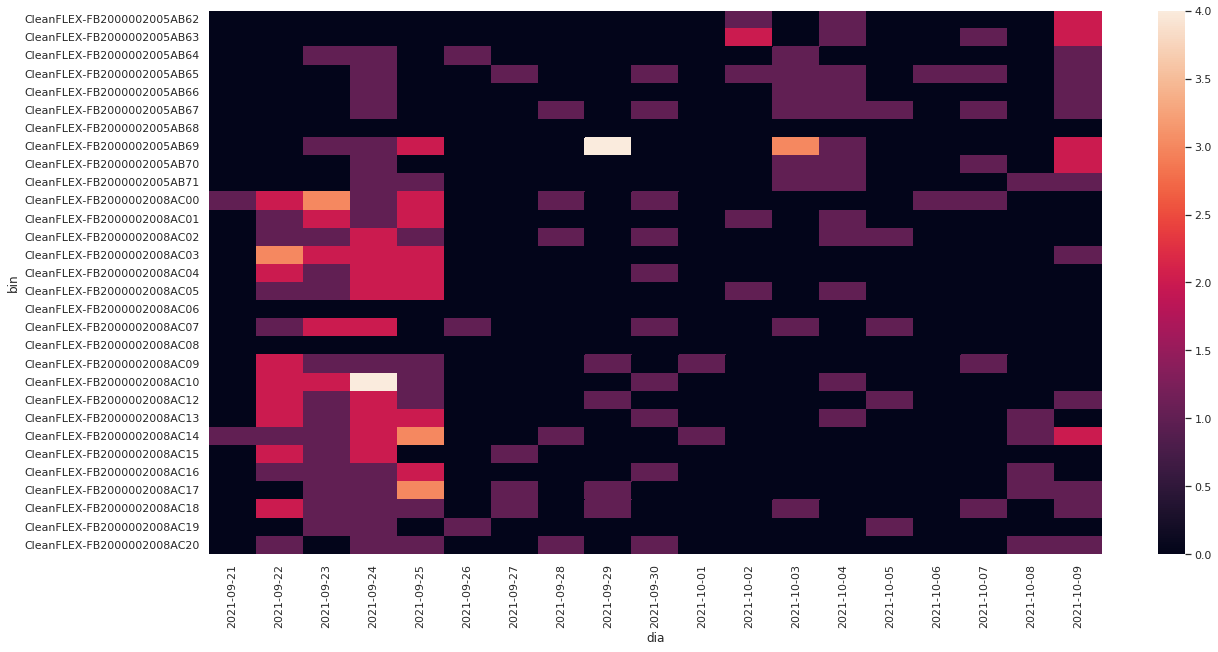

In [16]:
import seaborn as sns

sns.set(rc={'figure.figsize': (20, 10)})
sns.heatmap(df_dados.pivot_table(index='bin', columns='dia', values='quantidade_coleta'))

## Quais dias houve o maior número de coleta?

In [17]:
df_dados

,bin,dia,quantidade_coleta
0,CleanFLEX-FB2000002008AC02,2021-09-21,0
1,CleanFLEX-FB2000002008AC02,2021-09-22,1
2,CleanFLEX-FB2000002008AC02,2021-09-23,1
3,CleanFLEX-FB2000002008AC02,2021-09-24,2
4,CleanFLEX-FB2000002008AC02,2021-09-25,1
...,...,...,...
565,CleanFLEX-FB2000002005AB69,2021-10-05,0
566,CleanFLEX-FB2000002005AB69,2021-10-06,0
567,CleanFLEX-FB2000002005AB69,2021-10-07,0
568,CleanFLEX-FB2000002005AB69,2021-10-08,0


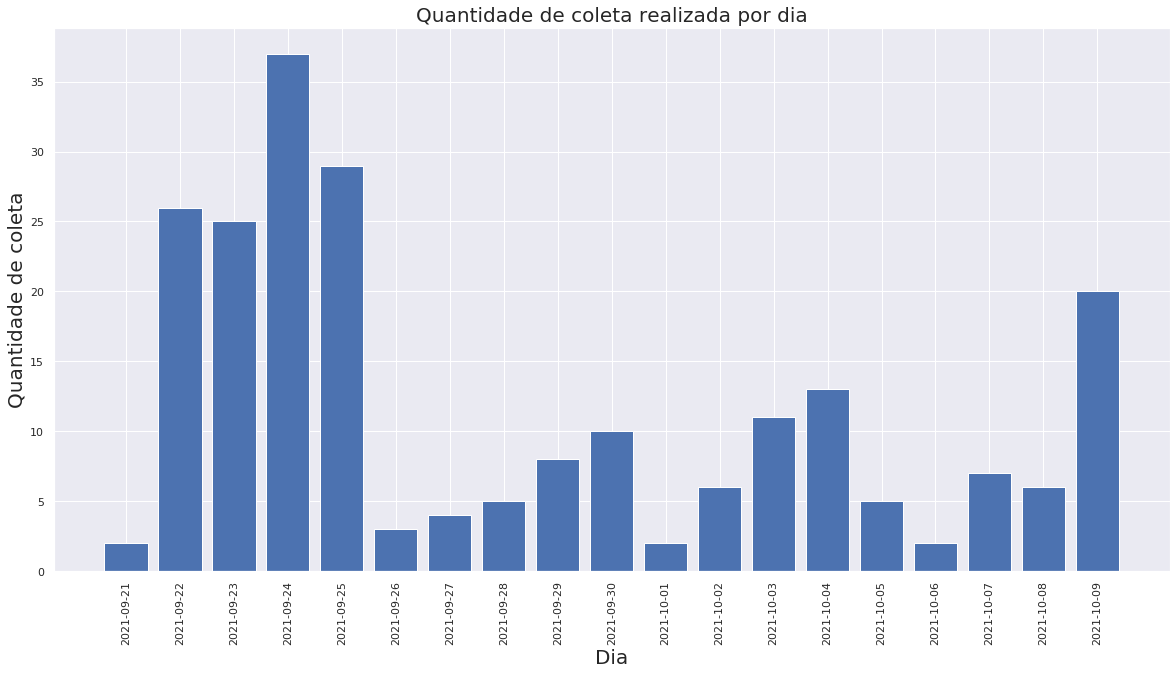

In [18]:
dados_grafico = df_dados[['dia', 'quantidade_coleta']].groupby('dia').sum()
plt.bar(dados_grafico.index, dados_grafico.quantidade_coleta)
plt.xticks(rotation=90)
plt.title('Quantidade de coleta realizada por dia', fontsize=20)
plt.xlabel('Dia', fontsize=20)
plt.ylabel('Quantidade de coleta', fontsize=20)
plt.show()

# ARIMA

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
from pandas.plotting import autocorrelation_plot

dfSmartBin = dfSmartBins[dfSmartBins.binId == 'CleanFLEX-FB2000002008AC12']
series = dfSmartBin[['timesTamp', 'currentFillLevel']].set_index('timesTamp')
series

,currentFillLevel
timesTamp,
2021-09-21 13:00:03,13
2021-09-21 14:00:05,12
2021-09-21 15:00:05,12
2021-09-21 16:00:03,12
2021-09-21 17:00:05,12
...,...
2021-10-09 19:00:14,3
2021-10-09 20:00:04,3
2021-10-09 21:00:06,3


In [21]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series, order=(1, 1, 1))
model_fit = model.fit()
model_fit.predict()

/home/luis/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/luis/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/luis/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


timesTamp
2021-09-21 13:00:03     0.000000
2021-09-21 14:00:05    12.999932
2021-09-21 15:00:05    12.045405
2021-09-21 16:00:03    12.043430
2021-09-21 17:00:05    12.041620
                         ...    
2021-10-09 19:00:14    93.538508
2021-10-09 20:00:04     5.156016
2021-10-09 21:00:06     5.151179
2021-10-09 22:00:06     5.146363
2021-10-09 23:00:04     5.141568
Name: predicted_mean, Length: 429, dtype: float64

In [25]:
model_fit.forecast(20000)

/home/luis/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


429       5.136795
430       7.079272
431       8.845102
432      10.450348
433      11.909614
           ...    
20424    26.496958
20425    26.496958
20426    26.496958
20427    26.496958
20428    26.496958
Name: predicted_mean, Length: 20000, dtype: float64